In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/Anthracnose/chili'

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

train_files, val_files, test_files = [], [], []

class_names = os.listdir(base_dir)
class_names = [c for c in class_names if os.path.isdir(os.path.join(base_dir, c))]

for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    all_files = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

    train_val, test = train_test_split(all_files, test_size=test_ratio, random_state=42)
    train, val = train_test_split(train_val, test_size=val_ratio/(train_ratio + val_ratio), random_state=42)

    train_files += train
    val_files += val
    test_files += test

print("Total Train:", len(train_files))
print("Total Val:", len(val_files))
print("Total Test:", len(test_files))

train_dir = train_files
val_dir = val_files
test_dir = test_files

Mounted at /content/drive
Total Train: 803
Total Val: 174
Total Test: 173


In [3]:
IMG_SIZE = (224, 224)
def preprocess_image(file_path):
    img = load_img(file_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    return img_array / 255.0

def get_labels(file_list):
    return [os.path.basename(os.path.dirname(path)) for path in file_list]

X_train = np.array([preprocess_image(path) for path in train_files])
y_train = get_labels(train_files)

X_val = np.array([preprocess_image(path) for path in val_files])
y_val = get_labels(val_files)

X_test = np.array([preprocess_image(path) for path in test_files])
y_test = get_labels(test_files)

encoder = LabelEncoder()
y_train = to_categorical(encoder.fit_transform(y_train))
y_val = to_categorical(encoder.transform(y_val))
y_test = to_categorical(encoder.transform(y_test))

num_classes = y_train.shape[1]

In [5]:
print("There is ",num_classes," in Field")

There is  3  in Field


In [44]:
model2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,977,315 (22.80 MB)

 Trainable params: 5,977,315 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history2 = model2.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)

train_acc2 = history2.history['accuracy'][-1]
val_acc2 = history2.history['val_accuracy'][-1]

print(f"Akurasi Pelatihan: {train_acc2 * 100:.2f}%")
print(f"Akurasi Validasi: {val_acc2 * 100:.2f}%")

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4159 - loss: 2.7382 - val_accuracy: 0.4943 - val_loss: 0.7765
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6405 - loss: 0.6655 - val_accuracy: 0.7931 - val_loss: 0.4132
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8120 - loss: 0.3527 - val_accuracy: 0.8621 - val_loss: 0.3027
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9220 - loss: 0.2277 - val_accuracy: 0.9368 - val_loss: 0.1925
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9812 - loss: 0.0894 - val_accuracy: 0.9483 - val_loss: 0.2439
Akurasi Pelatihan: 98.38%
Akurasi Validasi: 94.83%


In [46]:
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {acc2*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.8907 - loss: 0.5650

Test Accuracy: 92.49%


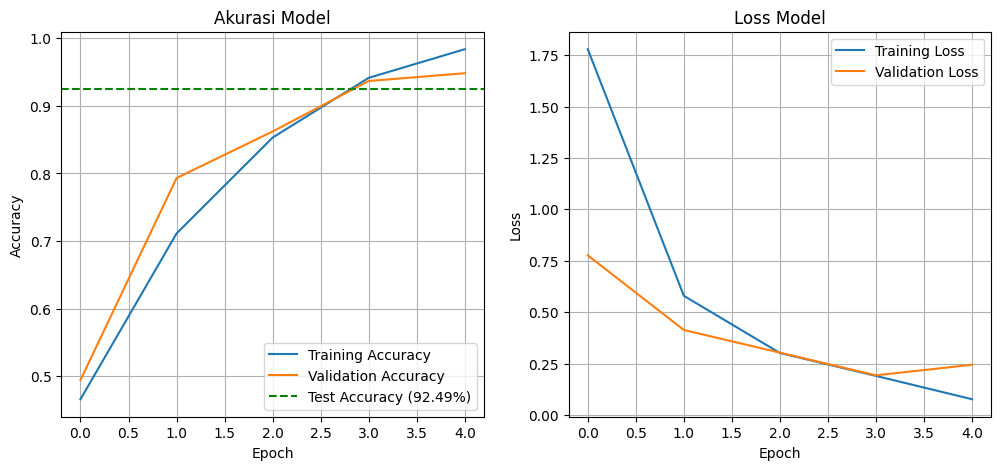

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=acc2, color='green', linestyle='--', label=f'Test Accuracy ({acc2*100:.2f}%)')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
model2.save("model_REV.h5", include_optimizer=False)
print("Model saved as model_cnn.h5")

Model saved as model_cnn.h5
